
# Data preparation

The first thing to do is check our data and somehow fix the missing values

In [466]:
import numpy as np
from pandas import read_csv
import sklearn.model_selection as sklearn
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def return_rows_with_NAN(df):
  is_NaN = data.isnull()
  row_has_NaN = is_NaN.any(axis=1)
  rows_with_NaN = data[row_has_NaN]
  return rows_with_NaN

In [467]:
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)

# Load data as df 
data = read_csv("/content/Food_Supply_Quantity_kg_Data.csv")
# data = read_csv("/content/Protein_Supply_Quantity_Data.csv")

In [468]:
rows_with_nan = return_rows_with_NAN(data)
rows_with_nan.loc[:, ['Country','Obesity','Undernourished','Confirmed','Deaths','Recovered','Active','Population']]


,Country,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population
4,Antigua and Barbuda,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0
10,Bahamas,32.1,NaN,2.100763,0.044784,1.735115,0.320865,393000.0
26,Canada,31.3,<2.5,2.109961,0.054203,1.909848,NaN,38190000.0
29,Chile,28.8,2.7,3.842229,0.097047,3.626194,NaN,19470000.0
52,French Polynesia,NaN,4.2,NaN,NaN,NaN,NaN,280000.0
59,Grenada,20.2,NaN,0.130973,0.000885,0.129204,0.000885,113000.0
80,Kiribati,45.6,2.7,NaN,NaN,NaN,NaN,125000.0
81,"Korea, North",7.1,47.8,NaN,NaN,NaN,NaN,25779000.0
105,Myanmar,5.7,10.6,NaN,NaN,NaN,NaN,54704000.0
109,New Caledonia,NaN,7.1,NaN,NaN,NaN,NaN,295000.0



Multiple situations did occur, 
1. type:   lines like the one with id 52 can only be removed
2. type:   missing value in line 26 can be counted
3. type:  missing values in 59 can be guessed, mean

```
# | id   |        Country         | Obesity  | Undernourished  | Confirmed  |  Deaths   | Recovered  |  Active   | Population |
# |------|------------------------|----------|-----------------|------------|-----------|------------|-----------|------------|
# |   4  | Antigua and Barbuda    | 19.1     | NaN             | 0.293878   | 0.007143  | 0.190816   | 0.095918  |    98000.0 |
# |  10  | Bahamas                | 32.1     | NaN             | 2.100763   | 0.044784  | 1.735115   | 0.320865  |   393000.0 |
# |  26  | Canada                 | 31.3     | <2.5            | 2.109961   | 0.054203  | 1.909848   | NaN       | 38190000.0 |
# |  29  | Chile                  | 28.8     | 2.7             | 3.842229   | 0.097047  | 3.626194   | NaN       | 19470000.0 |
# |  52  | French Polynesia       | NaN      | 4.2             | NaN        | NaN       | NaN        | NaN       |   280000.0 |
# |  59  | Grenada                | 20.2     | NaN             | 0.130973   | 0.000885  | 0.129204   | 0.000885  |   113000.0 |
# |  80  | Kiribati               | 45.6     | 2.7             | NaN        | NaN       | NaN        | NaN       |   125000.0 |
# |  81  | Korea, North           | 7.1      | 47.8            | NaN        | NaN       | NaN        | NaN       | 25779000.0 |
# | 105  | Myanmar                | 5.7      | 10.6            | NaN        | NaN       | NaN        | NaN       | 54704000.0 |
# | 109  | New Caledonia          | NaN      | 7.1             | NaN        | NaN       | NaN        | NaN       |   295000.0 |
# | 124  | Republic of Moldova    | 20.1     | NaN             | 4.646195   | 0.099859  | 4.333692   | 0.212645  |  3535000.0 |
# | 128  | Saint Kitts and Nevis  | 23.1     | NaN             | 0.074074   | 0.000000  | 0.066667   | 0.007407  |    54000.0 |
# | 129  | Saint Lucia            | 19.8     | NaN             | 0.996154   | 0.009890  | 0.480769   | 0.505495  |   182000.0 |
# | 147  | Taiwan*                | NaN      | 3.5             | 0.003914   | 0.000038  | 0.003571   | 0.000305  | 23610000.0 |
# | 148  | Tajikistan             | 12.6     | NaN             | 0.141139   | 0.000955  | 0.140185   | 0.000000  |  9429000.0 |
# | 155  | Turkmenistan           | 17.5     | 5.4             | NaN        | NaN       | NaN        | NaN       |  6031000.0 |
```



In [469]:
# type 1 removal
data = data.dropna(subset=['Confirmed', 'Deaths', 'Recovered'], thresh=1)

# type 2 counted
data['Active'] = np.where(pd.isna(data['Active']) , data['Confirmed']-data['Recovered']-data['Deaths'], data['Active'])

# type 3 removal
data['Undernourished'] = np.where((data['Undernourished'] == '<2.5') , 0, data['Undernourished'])
data = data.astype({"Undernourished": float})
mean_under = data['Undernourished'].mean(skipna=True)
data['Undernourished'] = np.where(pd.isna(data['Undernourished']) , mean_under , data['Undernourished'])
mean_obesity = data['Obesity'].mean(skipna=True)
data['Obesity'] = np.where(pd.isna(data['Obesity']) , mean_obesity , data['Obesity'])


# check if NaN removed
return_rows_with_NAN(data)

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)


In [470]:
from sklearn.utils import resample

def fuzify(x, mean):
    normalized = x / mean
    if 0 <= normalized < 0.7:
        return '0'
    if 0.7 <= normalized < 0.8:
        return '1'
    # if 0.375 <= normalized < 0.875:
    #     return 0.5
    if 0.8 <= normalized < 0.9:
        return '2'
    if 0.9 <= normalized <= 1:
        return '3'

# target atribute creation recovered/confirmed
data['Target'] = data['Recovered']/data['Confirmed']
# mean = data['Target'].mean()
# data['Target'] = data['Target'].map(lambda x: fuzify(x, mean)).astype('object')
max = data['Target'].max()
data['Target'] = data['Target'].map(lambda x: fuzify(x, max)).astype('object')
# data['Target'] = pd.qcut(data['Target'], q=2, labels=['0', '1']).astype('object')


data['Target'].value_counts()

3    65
2    45
0    31
1    23
Name: Target, dtype: int64

In [471]:
# checking if all columns ecept Country and unit is of numeric type
data.dtypes

Country                          object
Alcoholic Beverages             float64
Animal fats                     float64
Animal Products                 float64
Aquatic Products, Other         float64
Cereals - Excluding Beer        float64
Eggs                            float64
Fish, Seafood                   float64
Fruits - Excluding Wine         float64
Meat                            float64
Milk - Excluding Butter         float64
Miscellaneous                   float64
Offals                          float64
Oilcrops                        float64
Pulses                          float64
Spices                          float64
Starchy Roots                   float64
Stimulants                      float64
Sugar & Sweeteners              float64
Sugar Crops                     float64
Treenuts                        float64
Vegetable Oils                  float64
Vegetables                      float64
Vegetal Products                float64
Obesity                         float64


# Visualisation and statistics

In [472]:
# describe numeric variables
data.describe()

,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,1.640000e+02
mean,3.062504,0.225035,12.212859,0.013885,11.780798,0.470140,1.334066,5.643295,3.340460,6.634123,0.409995,0.195245,0.745320,0.539955,0.092604,5.388576,0.205249,2.815534,0.095201,0.117897,0.854043,6.039578,37.783638,18.701227,10.462420,2.021972,0.039370,1.452356,0.530247,4.562076e+07
std,2.383244,0.281732,5.902524,0.131623,5.873225,0.335623,1.190893,3.203894,1.745447,5.031661,0.610806,0.161258,1.637289,0.603669,0.122932,5.651359,0.191331,1.549768,0.383775,0.147522,0.449838,3.562672,5.902872,9.391649,12.010963,2.360454,0.048718,1.927617,1.321813,1.591165e+08
min,0.000000,0.001800,1.739100,0.000000,3.401400,0.023900,0.034200,0.659600,0.356000,0.096300,0.000000,0.000000,0.009800,0.000000,0.000000,0.679600,0.004200,0.366600,0.000000,0.000000,0.091500,0.857000,23.113200,2.100000,0.000000,0.000312,0.000000,0.000000,0.000000,5.400000e+04
25%,0.943550,0.040275,7.153025,0.000000,7.047225,0.183875,0.547975,3.485975,1.881050,2.174550,0.029975,0.105500,0.133400,0.140075,0.017275,2.014225,0.083975,1.728075,0.000000,0.018225,0.503050,3.592350,33.410075,8.675000,0.000000,0.140976,0.002013,0.099107,0.012107,2.926500e+06
50%,2.893000,0.118000,12.097550,0.000000,10.142750,0.456150,1.019450,5.021250,3.379900,5.435150,0.189600,0.166800,0.324950,0.308600,0.043100,3.108650,0.163700,2.592100,0.000000,0.080450,0.775550,5.001050,37.900700,21.250000,7.150000,1.011570,0.011998,0.475402,0.089447,1.031600e+07
75%,4.724650,0.254625,16.584575,0.001175,15.131050,0.645550,1.793975,6.869475,4.404900,10.535350,0.566875,0.226450,0.656275,0.731500,0.124800,5.624025,0.265775,3.810775,0.000000,0.146150,1.075250,7.777150,42.846700,25.700000,13.675000,3.487069,0.069503,2.622874,0.347880,3.279175e+07
max,15.370600,1.355900,26.886500,1.679400,29.804500,1.696000,8.795900,19.302800,8.170000,20.837800,3.663400,1.225600,12.176300,3.483800,0.662600,27.712800,1.282300,9.725900,3.067700,0.756900,2.202600,19.299500,48.258500,45.500000,59.600000,10.408199,0.185428,9.039871,8.019819,1.402385e+09


In [473]:
# describe categorical variables
data.groupby('Target').size()

Target
0    31
1    23
2    45
3    65
dtype: int64

Alcoholic Beverages            AxesSubplot(0.125,0.787927;0.065678x0.0920732)
Animal fats                 AxesSubplot(0.203814,0.787927;0.065678x0.0920732)
Animal Products             AxesSubplot(0.282627,0.787927;0.065678x0.0920732)
Aquatic Products, Other     AxesSubplot(0.361441,0.787927;0.065678x0.0920732)
Cereals - Excluding Beer    AxesSubplot(0.440254,0.787927;0.065678x0.0920732)
Eggs                        AxesSubplot(0.519068,0.787927;0.065678x0.0920732)
Fish, Seafood               AxesSubplot(0.597881,0.787927;0.065678x0.0920732)
Fruits - Excluding Wine     AxesSubplot(0.676695,0.787927;0.065678x0.0920732)
Meat                        AxesSubplot(0.755508,0.787927;0.065678x0.0920732)
Milk - Excluding Butter     AxesSubplot(0.834322,0.787927;0.065678x0.0920732)
Miscellaneous                  AxesSubplot(0.125,0.677439;0.065678x0.0920732)
Offals                      AxesSubplot(0.203814,0.677439;0.065678x0.0920732)
Oilcrops                    AxesSubplot(0.282627,0.677439;0.0656

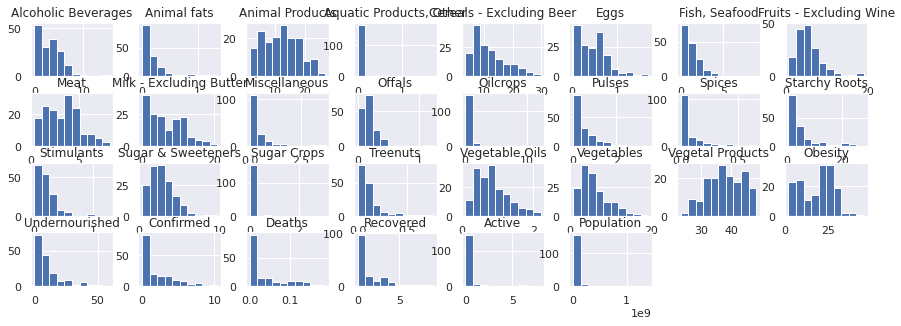

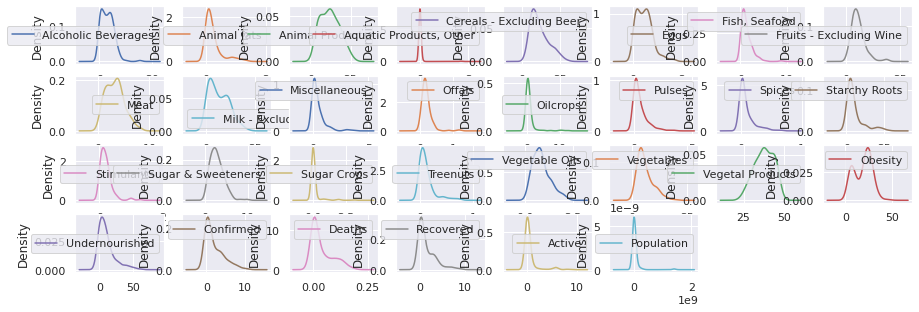

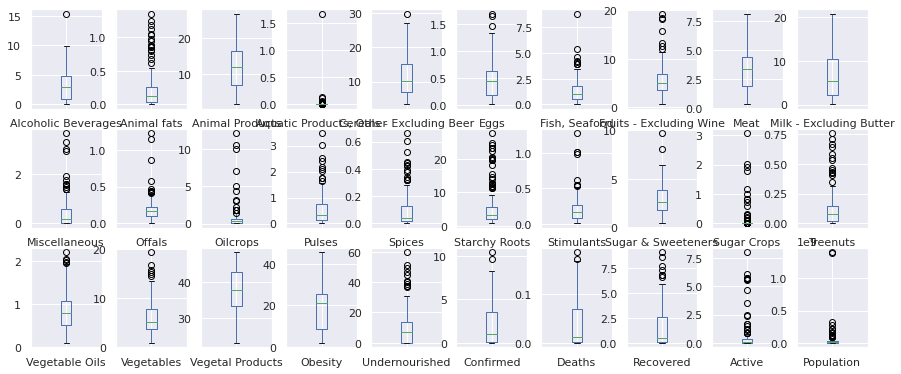

In [474]:
import plotly.express as px

data.hist(figsize=(15,10), layout=(8,8))
data.plot(kind='density', subplots=True, layout=(8,8), sharex = False, figsize=(15,10))
data.plot(kind='box', subplots=True, layout=(7,10), sharex = False, sharey=False,  figsize=(15,15))


# fig = px.scatter_matrix(data)
# fig.show()

Animal Products, Obesity and Vegetal Products have a roughly normal distribution. Alcoholic Beverages, Animal Fats, Milk - Excluding Butter, on the other hand, present a right skewed distribution.

In [475]:
data.skew(axis = 0, skipna = True)

Alcoholic Beverages          1.078912
Animal fats                  2.071791
Animal Products              0.276314
Aquatic Products, Other     12.588439
Cereals - Excluding Beer     0.886904
Eggs                         1.002727
Fish, Seafood                2.321963
Fruits - Excluding Wine      1.610589
Meat                         0.441191
Milk - Excluding Butter      0.562459
Miscellaneous                2.890873
Offals                       3.430754
Oilcrops                     5.122027
Pulses                       2.083786
Spices                       2.250222
Starchy Roots                2.098638
Stimulants                   2.583639
Sugar & Sweeteners           1.032276
Sugar Crops                  5.236852
Treenuts                     2.285705
Vegetable Oils               0.801571
Vegetables                   1.138216
Vegetal Products            -0.276124
Obesity                     -0.134956
Undernourished               1.703540
Confirmed                    1.300358
Deaths      

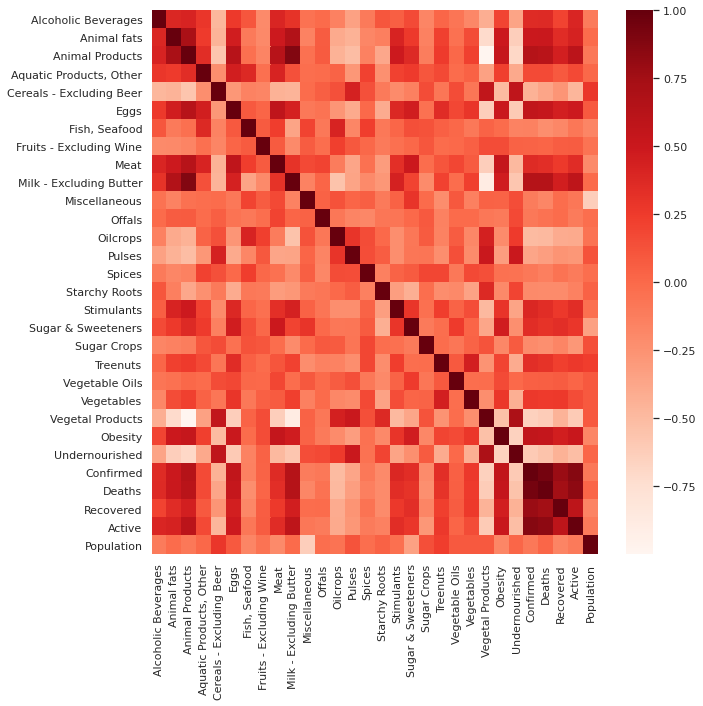

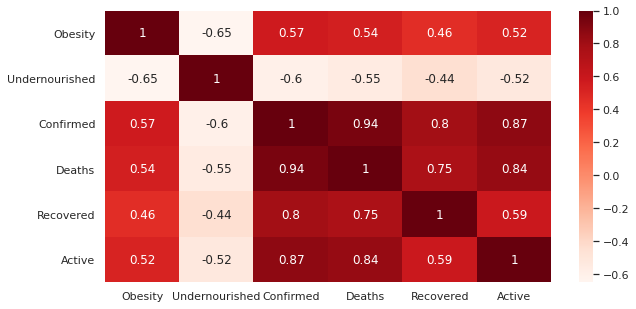

In [476]:
# calculate the correlation matrix
corr_detailed = data[['Obesity','Undernourished','Confirmed','Deaths','Recovered','Active']].corr(method='spearman')
corr_all = data.corr(method='spearman')

# plot the heatmap
fig2, ax = plt.subplots(figsize=(10,10))       
sns.heatmap(corr_all, 
            xticklabels=corr_all.columns,
            yticklabels=corr_all.columns,
            cmap=plt.cm.Reds
            )

fig, ax = plt.subplots(figsize=(10,5))       
sns.heatmap(corr_detailed, 
            xticklabels=corr_detailed.columns,
            yticklabels=corr_detailed.columns,
            annot=True, cmap=plt.cm.Reds
            )



We can now see that obesity and undernurishment have roughly the same correlation with covid deaths than recovery and undernourished patients has a stronger correlation with covid recovery than deaths. This could mean that in average, obese patients are most likely to die from covid while undernourished are most likely to survive. This is why obesity worsens outcomes from covid. Such results are to be interpreted carefully as many other factors are to be taken into account - for example, undernourished patients are most likely to be in emerging countries, where the population is very young and most likely to survive. 

# Normalization

In [477]:
from sklearn.preprocessing import Normalizer

# normalization of numeric atributes
data_normalized = data.copy()
for column in data_normalized.columns:
  if data_normalized[column].dtype == 'float64':
    data_normalized[column] = (data_normalized[column]-data_normalized[column].min()) / (data_normalized[column].max()-data_normalized[column].min())
    # data_normalized[column] = (data_normalized[column]-data_normalized[column].mean()) / (data_normalized[column].std())

In [478]:
data_normalized

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population),Target
0,Afghanistan,0.000091,0.144376,0.305996,0.000000,0.810825,0.111237,0.000091,0.251561,0.108267,0.360943,0.019872,0.167836,0.004948,0.084764,0.086628,0.007421,0.237540,0.104954,0.000000,0.101731,0.209843,0.320304,0.694018,0.055300,0.500000,0.013626,0.033360,0.013648,0.001568,0.027721,%,2
1,Albania,0.108773,0.098885,0.677179,0.000000,0.090152,0.333473,0.020361,0.328618,0.195610,0.753321,0.030655,0.189621,0.076267,0.068316,0.001207,0.041800,0.079258,0.125020,0.000000,0.200159,0.111127,0.592018,0.322812,0.465438,0.104027,0.285071,0.274778,0.198303,0.140117,0.001985,%,0
2,Algeria,0.017638,0.019496,0.313921,0.000000,0.389356,0.301298,0.023671,0.306841,0.099117,0.362684,0.045613,0.070986,0.027904,0.137293,0.084063,0.127784,0.170096,0.156807,0.000000,0.152200,0.445029,0.585138,0.686088,0.564516,0.065436,0.023500,0.035368,0.018537,0.008824,0.031592,%,0
3,Angola,0.377910,0.040027,0.126800,0.000000,0.216153,0.020812,0.198192,0.286480,0.217699,0.035427,0.031801,0.126469,0.033600,0.186779,0.001358,0.644785,0.036460,0.158441,0.000000,0.008059,0.262801,0.078466,0.873284,0.108295,0.419463,0.005897,0.007877,0.006284,0.000426,0.023153,%,3
4,Antigua and Barbuda,0.232678,0.005096,0.593389,0.000000,0.098269,0.121703,0.469623,0.540975,0.682467,0.302293,0.194874,0.181054,0.017047,0.052816,0.230003,0.028580,0.119083,0.374846,0.000000,0.033426,0.340439,0.249017,0.406044,0.391705,0.175544,0.028206,0.038521,0.021108,0.011960,0.000031,%,0
5,Argentina,0.277621,0.163651,0.700124,0.000000,0.189705,0.582501,0.049659,0.288786,0.855657,0.488706,0.000000,0.308339,0.000148,0.015156,0.018412,0.087389,0.339254,0.287094,0.000000,0.026424,0.408602,0.189416,0.299965,0.608295,0.077181,0.418513,0.583659,0.431996,0.042735,0.032320,%,2
6,Armenia,0.026115,0.134037,0.470224,0.000000,0.147589,0.331559,0.029150,0.291758,0.244625,0.474623,0.064285,0.248042,0.006584,0.041363,0.008301,0.050172,0.142477,0.244815,0.000000,0.146387,0.179527,0.859151,0.529825,0.433180,0.072148,0.545828,0.568119,0.597178,0.022129,0.002069,%,3
7,Australia,0.360663,0.230781,0.782522,0.001965,0.079404,0.250523,0.158896,0.189275,0.812503,0.578815,0.144483,0.345953,0.029557,0.015673,0.069122,0.078008,0.225804,0.231834,0.000000,0.419606,0.562882,0.232268,0.217432,0.652074,0.000000,0.010734,0.019035,0.011205,0.000899,0.018327,%,3
8,Austria,0.456814,0.630456,0.708872,0.000655,0.106434,0.457209,0.082404,0.211729,0.553494,0.592112,0.000136,0.085836,0.021247,0.013089,0.074555,0.087862,0.317972,0.239633,0.000000,0.312723,0.340770,0.230598,0.291132,0.456221,0.000000,0.455392,0.483634,0.497448,0.019132,0.006318,%,3
9,Azerbaijan,0.234012,0.186545,0.393778,0.000000,0.366942,0.320196,0.019152,0.222022,0.229754,0.396543,0.003958,0.125163,0.000386,0.009960,0.006641,0.148872,0.042641,0.126687,0.000000,0.251817,0.062527,0.499851,0.606284,0.410138,0.000000,0.219567,0.168383,0.246195,0.003584,0.007169,%,3


# Atribute selection and StratifiedKFold split

In [479]:
# manual remove these
data_normalized = data_normalized.drop('Unit (all except Population)', axis=1)
data_normalized = data_normalized.drop('Country', axis=1)
data_normalized = data_normalized.drop(['Confirmed', 'Recovered', 'Active', 'Deaths'], axis=1)
data_normalized



,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished,Population,Target
0,0.000091,0.144376,0.305996,0.000000,0.810825,0.111237,0.000091,0.251561,0.108267,0.360943,0.019872,0.167836,0.004948,0.084764,0.086628,0.007421,0.237540,0.104954,0.000000,0.101731,0.209843,0.320304,0.694018,0.055300,0.500000,0.027721,2
1,0.108773,0.098885,0.677179,0.000000,0.090152,0.333473,0.020361,0.328618,0.195610,0.753321,0.030655,0.189621,0.076267,0.068316,0.001207,0.041800,0.079258,0.125020,0.000000,0.200159,0.111127,0.592018,0.322812,0.465438,0.104027,0.001985,0
2,0.017638,0.019496,0.313921,0.000000,0.389356,0.301298,0.023671,0.306841,0.099117,0.362684,0.045613,0.070986,0.027904,0.137293,0.084063,0.127784,0.170096,0.156807,0.000000,0.152200,0.445029,0.585138,0.686088,0.564516,0.065436,0.031592,0
3,0.377910,0.040027,0.126800,0.000000,0.216153,0.020812,0.198192,0.286480,0.217699,0.035427,0.031801,0.126469,0.033600,0.186779,0.001358,0.644785,0.036460,0.158441,0.000000,0.008059,0.262801,0.078466,0.873284,0.108295,0.419463,0.023153,3
4,0.232678,0.005096,0.593389,0.000000,0.098269,0.121703,0.469623,0.540975,0.682467,0.302293,0.194874,0.181054,0.017047,0.052816,0.230003,0.028580,0.119083,0.374846,0.000000,0.033426,0.340439,0.249017,0.406044,0.391705,0.175544,0.000031,0
5,0.277621,0.163651,0.700124,0.000000,0.189705,0.582501,0.049659,0.288786,0.855657,0.488706,0.000000,0.308339,0.000148,0.015156,0.018412,0.087389,0.339254,0.287094,0.000000,0.026424,0.408602,0.189416,0.299965,0.608295,0.077181,0.032320,2
6,0.026115,0.134037,0.470224,0.000000,0.147589,0.331559,0.029150,0.291758,0.244625,0.474623,0.064285,0.248042,0.006584,0.041363,0.008301,0.050172,0.142477,0.244815,0.000000,0.146387,0.179527,0.859151,0.529825,0.433180,0.072148,0.002069,3
7,0.360663,0.230781,0.782522,0.001965,0.079404,0.250523,0.158896,0.189275,0.812503,0.578815,0.144483,0.345953,0.029557,0.015673,0.069122,0.078008,0.225804,0.231834,0.000000,0.419606,0.562882,0.232268,0.217432,0.652074,0.000000,0.018327,3
8,0.456814,0.630456,0.708872,0.000655,0.106434,0.457209,0.082404,0.211729,0.553494,0.592112,0.000136,0.085836,0.021247,0.013089,0.074555,0.087862,0.317972,0.239633,0.000000,0.312723,0.340770,0.230598,0.291132,0.456221,0.000000,0.006318,3
9,0.234012,0.186545,0.393778,0.000000,0.366942,0.320196,0.019152,0.222022,0.229754,0.396543,0.003958,0.125163,0.000386,0.009960,0.006641,0.148872,0.042641,0.126687,0.000000,0.251817,0.062527,0.499851,0.606284,0.410138,0.000000,0.007169,3


In [481]:
data2 = data_normalized.values

print(type(data2))
print(data2.shape)

<class 'numpy.ndarray'>
(164, 27)


In [482]:
pip install multi-imbalance

In [483]:
pip install scikit-learn

In [484]:
pip install imbalanced-learn

Class=2, n=52 (20.884%)
Class=0, n=64 (25.703%)
Class=3, n=65 (26.104%)
Class=1, n=68 (27.309%)


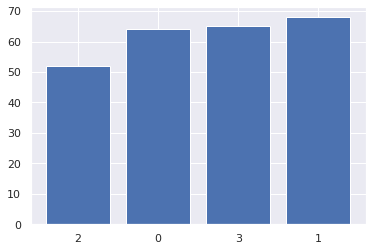

['2' '0' '0' '3' '0' '2' '3' '3' '3' '3' '2' '2' '2' '3' '0' '3' '2' '1'
 '1' '2' '2' '2' '2' '3' '3' '3' '3' '3' '2' '3' '3' '3' '0' '1' '3' '3'
 '2' '0' '2' '3' '3' '3' '1' '2' '1' '2' '1' '1' '2' '3' '0' '0' '3' '3'
 '3' '2' '3' '0' '3' '3' '3' '2' '2' '1' '0' '1' '3' '3' '2' '2' '3' '0'
 '2' '2' '1' '2' '3' '2' '2' '2' '3' '3' '3' '2' '0' '0' '3' '1' '3' '3'
 '0' '1' '2' '1' '2' '3' '3' '1' '1' '2' '3' '0' '3' '3' '0' '3' '0' '2'
 '2' '2' '0' '3' '3' '2' '2' '3' '3' '2' '1' '3' '3' '2' '1' '3' '0' '0'
 '3' '1' '3' '2' '0' '0' '3' '2' '0' '3' '0' '3' '1' '3' '0' '0' '3' '3'
 '1' '1' '2' '3' '1' '3' '0' '2' '3' '0' '0' '0' '2' '3' '3' '3' '1' '0'
 '2' '2' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '2' '2' '2' '2' '2

In [485]:
# Independent and target variables
X = data2[:,0:25]
y = data2[:,26]

from multi_imbalance.resampling.mdo import MDO
from sklearn.utils import resample

# # Mahalanbois Distance Oversampling
# mdo = MDO(seed=8)
# # preprocess
# X, y = mdo.fit_resample(X, y)

# # https://machinelearningmastery.com/multi-class-imbalanced-classification/
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
# transform the dataset
oversample = ADASYN()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()


print(y)

In [486]:
import sklearn.model_selection as sklearn
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression


In [487]:
# The folds are made by preserving the percentage of samples for each class. Meaning: there should be no fold with only one type of target value
kfold2 = sklearn.StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
print(kfold2)

StratifiedKFold(n_splits=10, random_state=7, shuffle=True)


In [488]:
# check if split correctly
for train_index, test_index in kfold2.split(X, y):
     print("TRAIN:", train_index,  "\n TEST:", test_index)
     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]


TRAIN: [  0   1   2   3   5   6   7   8   9  10  11  12  13  14  16  17  18  19
  20  21  23  24  26  27  28  29  30  31  32  34  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  52  53  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  71  72  74  75  76  77  78  79  80
  81  82  83  84  85  86  88  89  90  91  92  93  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 115 117 118 119 120
 121 122 123 124 125 126 128 129 130 131 133 134 135 136 137 138 139 140
 141 142 143 144 146 147 148 149 150 151 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 169 170 171 172 173 174 175 176 178 179 180
 181 183 184 185 186 187 188 189 190 191 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 216 217 218 219
 220 221 222 223 224 226 227 228 229 230 231 232 233 234 235 236 237 238
 239 240 241 242 243 244 246 248] 
 TEST: [  4  15  22  25  33  51  54  70  73  87  94 114 116 127 132 145 152 168
 1

# Models

In [489]:
# function to draw roc curve
def roc_kfold_graph(cv, model, X, y):
  tprs = []
  aucs = []
  mean_fpr = np.linspace(0, 1, 100)
  fig, ax = plt.subplots(figsize=(8, 5))
  for i, (train, test) in enumerate(cv.split(X, y)):
      model.fit(X[train], y[train])
      viz = plot_roc_curve(model, X[test], y[test],
                          name='ROC fold {}'.format(i),
                          alpha=0.3, lw=1, ax=ax)
      interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
      interp_tpr[0] = 0.0
      tprs.append(interp_tpr)
      aucs.append(viz.roc_auc)

  ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
          label='Chance', alpha=.8)

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = auc(mean_fpr, mean_tpr)
  std_auc = np.std(aucs)
  ax.plot(mean_fpr, mean_tpr, color='b',
          label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
          lw=2, alpha=.8)

  std_tpr = np.std(tprs, axis=0)
  tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
  ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                  label=r'$\pm$ 1 std. dev.')

  ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
        title=name)
  ax.legend(loc="lower right")
  plt.show()

https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

The function cross_val_predict is appropriate for:

* Visualization of predictions obtained from different models.



[2 0 0 3 0 2 3 3 3 3 2 2 2 3 0 3 2 1 1 2 2 2 2 3 3 3 3 3 2 3 3 3 0 1 3 3 2
 0 2 3 3 3 1 2 1 2 1 1 2 3 0 0 3 3 3 2 3 0 3 3 3 2 2 1 0 1 3 3 2 2 3 0 2 2
 1 2 3 2 2 2 3 3 3 2 0 0 3 1 3 3 0 1 2 1 2 3 3 1 1 2 3 0 3 3 0 3 0 2 2 2 0
 3 3 2 2 3 3 2 1 3 3 2 1 3 0 0 3 1 3 2 0 0 3 2 0 3 0 3 1 3 0 0 3 3 1 1 2 3
 1 3 0 2 3 0 0 0 2 3 3 3 1 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2]
DT_def {'fit_time': 0.0046, 'score_time': 0.0151, 'test_balanced_accuracy': 0.4673, 'test_precision_weighted': 0.4663, 'test_recall_weighted': 0.4748, 'test_f1_weighted': 0.4557, 'test_roc_auc_ovo_weighted': 0.6468}
              precision    recall  f1-score   support

           0       0.54      0.58      0.56        64
           1       0.57      0.60      0.59        68
           2       0.39      0.37      0.38        52
           3       0.35      0.32      0.34        65

    ac

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



DT_depth {'fit_time': 0.0041, 'score_time': 0.0182, 'test_balanced_accuracy': 0.4235, 'test_precision_weighted': 0.4592, 'test_recall_weighted': 0.4345, 'test_f1_weighted': 0.4147, 'test_roc_auc_ovo_weighted': 0.6503}
              precision    recall  f1-score   support

           0       0.51      0.56      0.53        64
           1       0.48      0.56      0.52        68
           2       0.38      0.25      0.30        52
           3       0.32      0.32      0.32        65

    accuracy                           0.43       249
   macro avg       0.42      0.42      0.42       249
weighted avg       0.43      0.43      0.43       249

DT_split {'fit_time': 0.005, 'score_time': 0.0136, 'test_balanced_accuracy': 0.4762, 'test_precision_weighted': 0.4653, 'test_recall_weighted': 0.4827, 'test_f1_weighted': 0.46, 'test_roc_auc_ovo_weighted': 0.6619}
              precision    recall  f1-score   support

           0       0.56      0.62      0.59        64
           1       0.54

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Bag_xgb {'fit_time': 2.951, 'score_time': 0.051, 'test_balanced_accuracy': 0.5398, 'test_precision_weighted': 0.5238, 'test_recall_weighted': 0.5587, 'test_f1_weighted': 0.52, 'test_roc_auc_ovo_weighted': 0.7939}
              precision    recall  f1-score   support

           0       0.61      0.73      0.67        64
           1       0.61      0.79      0.69        68
           2       0.42      0.27      0.33        52
           3       0.48      0.37      0.42        65

    accuracy                           0.56       249
   macro avg       0.53      0.54      0.53       249
weighted avg       0.54      0.56      0.54       249

knn {'fit_time': 0.0006, 'score_time': 0.0134, 'test_balanced_accuracy': 0.5898, 'test_precision_weighted': 0.6075, 'test_recall_weighted': 0.6065, 'test_f1_weighted': 0.5544, 'test_roc_auc_ovo_weighted': 0.8074}
              precision    recall  f1-score   support

           0       0.57      0.94      0.71        64
           1       0.70      0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



NB {'fit_time': 0.0016, 'score_time': 0.0152, 'test_balanced_accuracy': 0.3942, 'test_precision_weighted': 0.4426, 'test_recall_weighted': 0.4098, 'test_f1_weighted': 0.3508, 'test_roc_auc_ovo_weighted': 0.6272}
              precision    recall  f1-score   support

           0       0.36      0.94      0.52        64
           1       0.57      0.35      0.44        68
           2       0.30      0.06      0.10        52
           3       0.52      0.23      0.32        65

    accuracy                           0.41       249
   macro avg       0.44      0.39      0.34       249
weighted avg       0.45      0.41      0.36       249



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



svm {'fit_time': 0.034, 'score_time': 0.0164, 'test_balanced_accuracy': 0.4624, 'test_precision_weighted': 0.4444, 'test_recall_weighted': 0.4782, 'test_f1_weighted': 0.4453, 'test_roc_auc_ovo_weighted': 0.7766}
              precision    recall  f1-score   support

           0       0.50      0.67      0.57        64
           1       0.56      0.68      0.61        68
           2       0.41      0.17      0.24        52
           3       0.36      0.32      0.34        65

    accuracy                           0.48       249
   macro avg       0.46      0.46      0.44       249
weighted avg       0.46      0.48      0.45       249



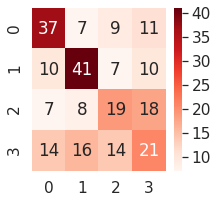

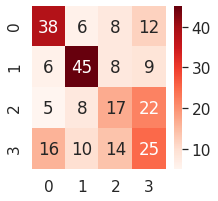

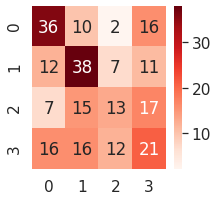

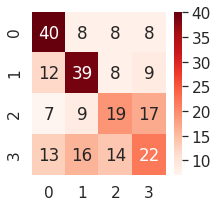

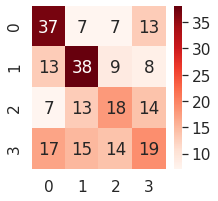

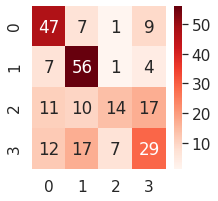

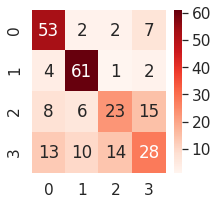

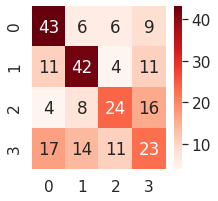

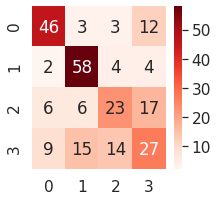

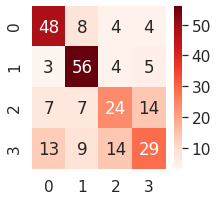

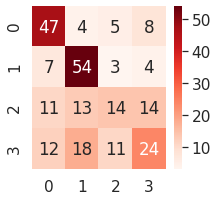

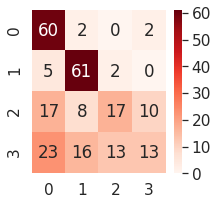

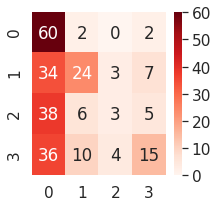

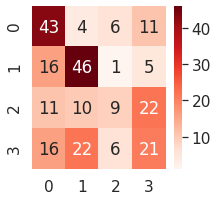

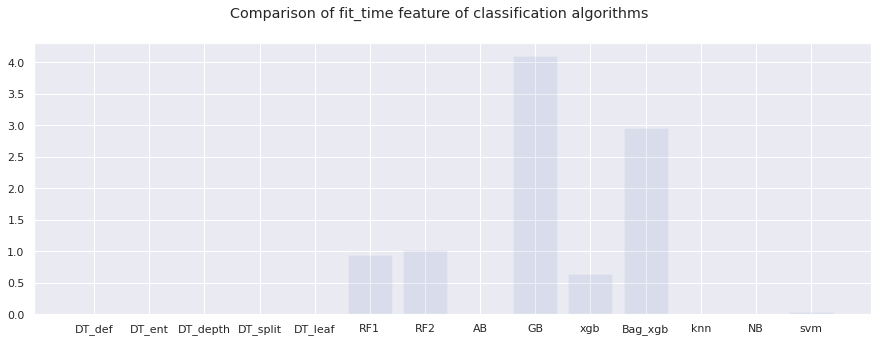

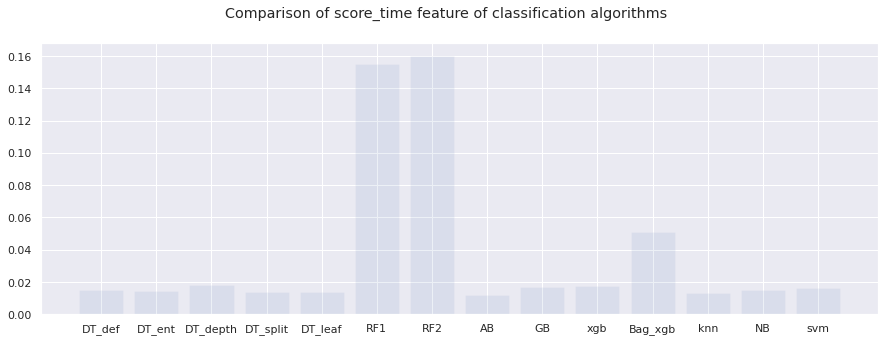

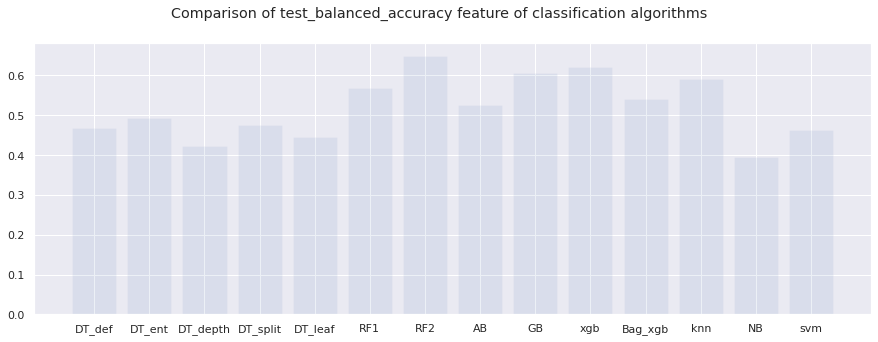

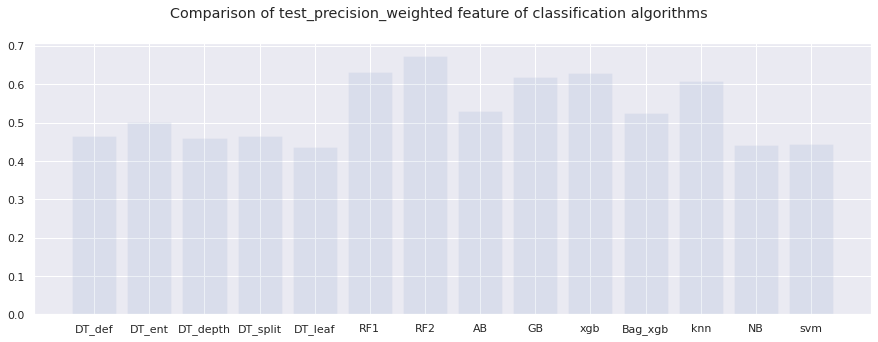

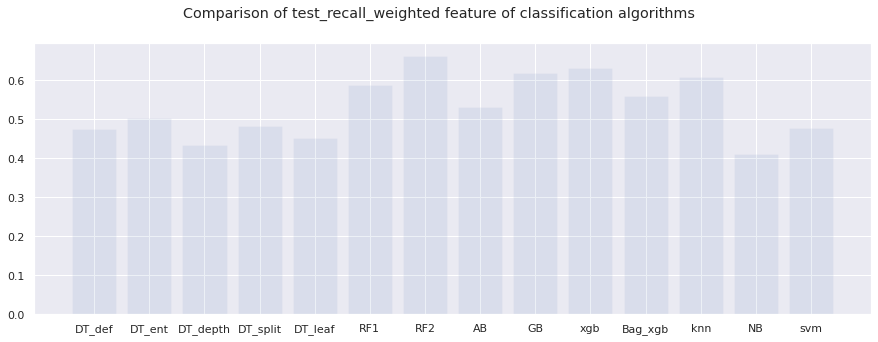

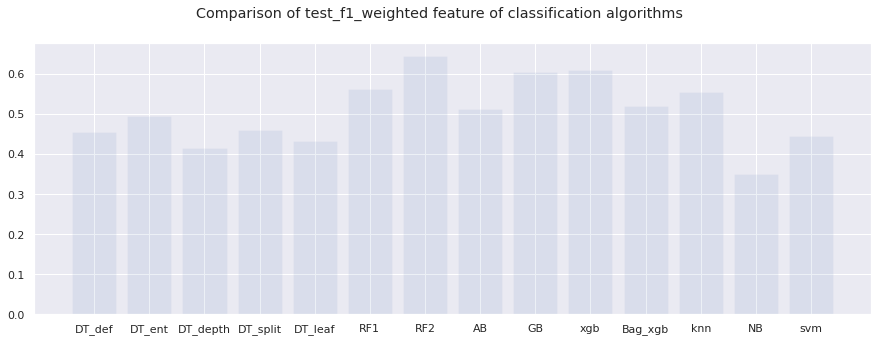

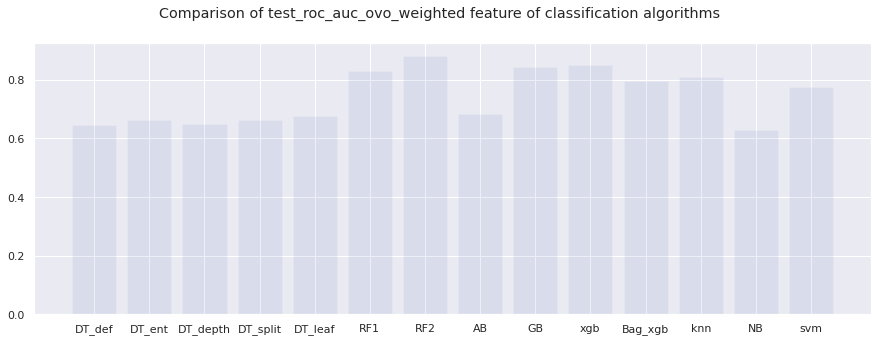

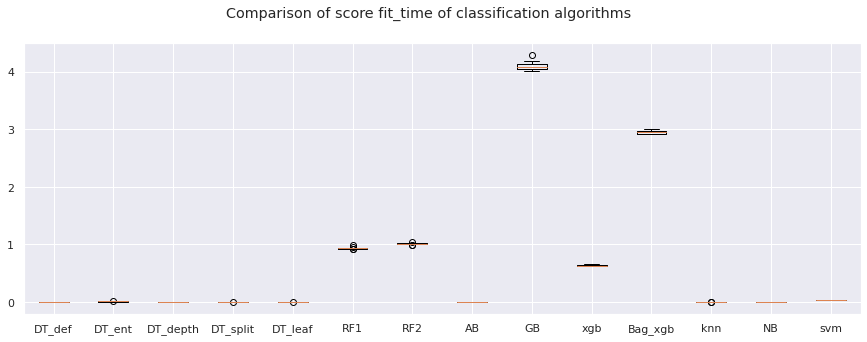

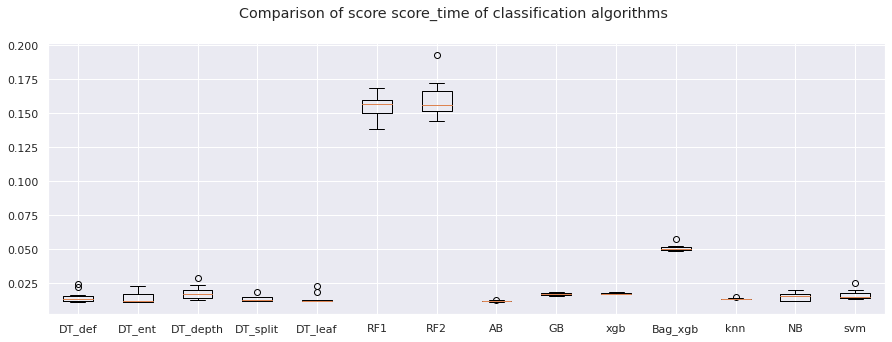

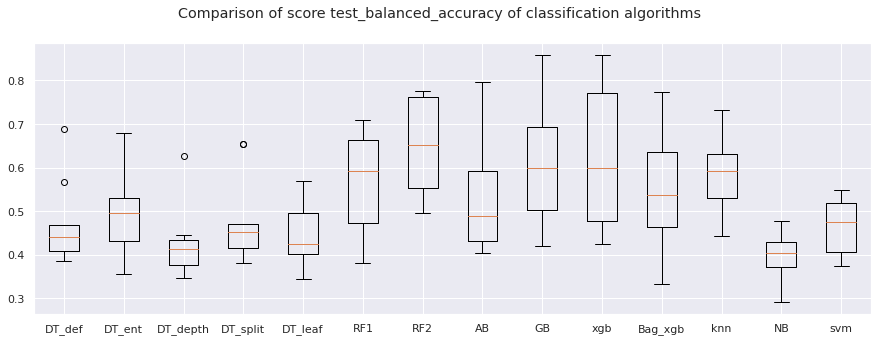

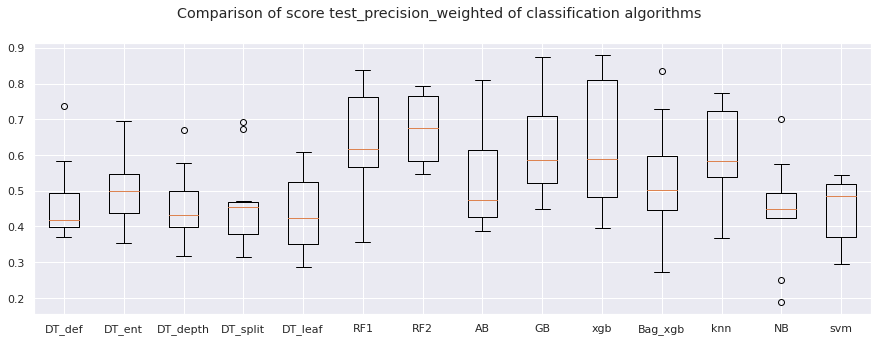

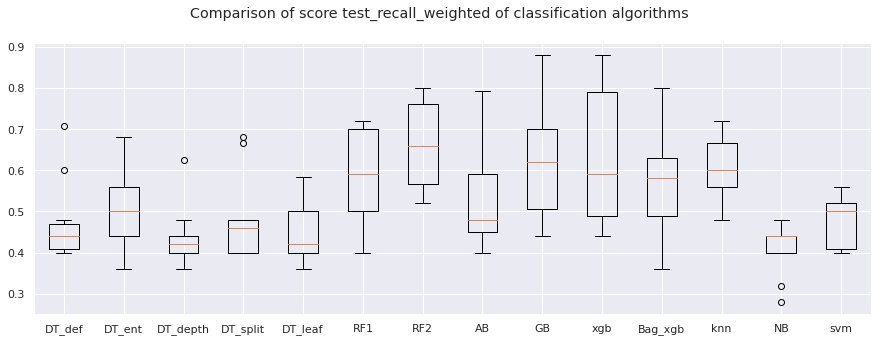

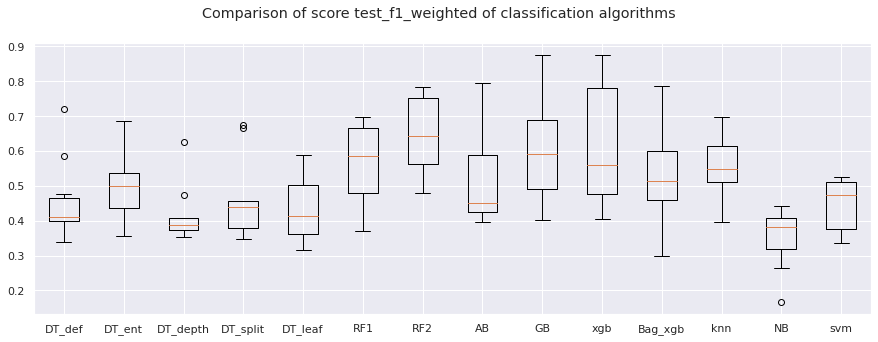

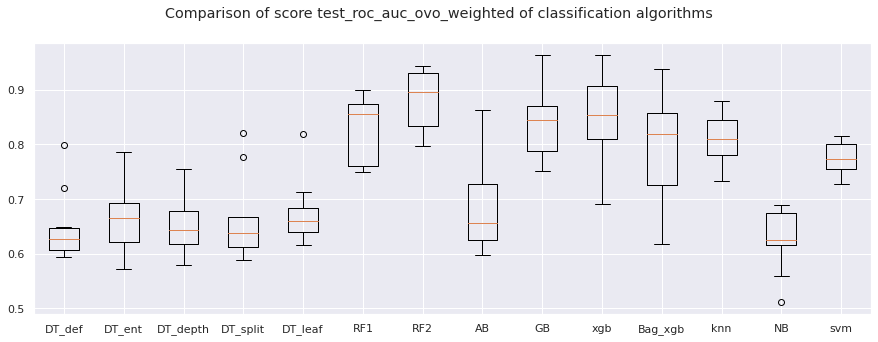

In [490]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_roc_curve
from matplotlib import pyplot
from sklearn.tree import plot_tree


models = []
# trees
models.append(('DT_def', DecisionTreeClassifier(random_state=8)))
models.append(('DT_ent', DecisionTreeClassifier(criterion='entropy', random_state=8)))
models.append(('DT_depth', DecisionTreeClassifier(max_depth=5, random_state=8)))
models.append(('DT_split', DecisionTreeClassifier(min_samples_split=4, random_state=8)))
models.append(('DT_leaf', DecisionTreeClassifier(min_samples_leaf=4, random_state=8)))
models.append(('RF1', RandomForestClassifier(n_estimators =500, random_state=8, max_depth=5 )))
models.append(('RF2', RandomForestClassifier(n_estimators =500, max_features=5, random_state=8)))
models.append(('AB', AdaBoostClassifier(DecisionTreeClassifier(),n_estimators = 500, random_state=8)))
models.append(('GB', GradientBoostingClassifier(n_estimators = 500,random_state=8)))
models.append(('xgb', xgb.XGBClassifier(n_estimators = 500, random_state=8)))
models.append(('Bag_xgb', BaggingClassifier(xgb.XGBClassifier(n_estimators = 500),max_samples=0.5, max_features=0.5, random_state=8)))
# # KNN
models.append(('knn', KNeighborsClassifier(n_neighbors=3, metric='minkowski', weights='distance')))
# # Naive bayes
models.append(('NB', GaussianNB()))
# SVM
models.append(('svm', svm.SVC(random_state=8, probability=True)))

# 'recall_weighted', 'f1_weighted', 'roc_auc' 
results = []
results2 = [] 
names = []
scoring = ['balanced_accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc_ovo_weighted' ]

# precision, recall and F1
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

print(y)


from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.model_selection import cross_val_predict, cross_validate

helper_dict = dict()

for name, model in models:
  cv_results = cross_validate(model, X, y, cv=kfold2, scoring=scoring)

  helper = []
  helper2 = []
  for key, value in cv_results.items():
    helper_dict[key] = round(value.mean(), 4)
    helper.append(value.mean())
    helper2.append(value)

  results.append(helper)
  results2.append(helper2)
  names.append(name)
  print(name, helper_dict)

  # # https://stackoverflow.com/questions/42263915/using-sklearn-cross-val-score-and-kfolds-to-fit-and-help-predict-model
  # generate confusion matrix
  predicted = cross_val_predict(model, X, y, cv=kfold2)
  # print(predicted)
  matrix = confusion_matrix(y, predicted)

  sns.set(font_scale=1.4)
  fig = pyplot.figure(figsize=(3, 3))      
  sns.heatmap(matrix, 
            annot=True, cmap=plt.cm.Reds, fmt='d'
            )
  sns.set(font_scale=1.0)
  # generate classification report
  report = classification_report(y, predicted)
  print(report)

  model.fit(X_train, y_train)
  # fig = pyplot.figure(figsize=(15, 15))    
  # plot_tree(model, feature_names=data_normalized.columns[:25], class_names=['0','1','2'], filled = True, max_depth=5, fontsize=12)
  # !!! generate roc start - works only with binary data
  # roc_kfold_graph(kfold2, model, X, y)

# print(results)
# print(results2)

for idx, key in enumerate(cv_results):
  fig = pyplot.figure(figsize=(15, 5))
  fig.suptitle('Comparison of '+ key + ' feature of classification algorithms')
  ax = fig.add_subplot(111)   # počet riadkov, počet stĺpcov, pozícia grafu
  pyplot.bar(np.arange(len(names)), [i[idx] for i in results], align='center', alpha=0.1)  
  pyplot.xticks(np.arange(len(names)), names)
  pyplot.show()


for idx, key in enumerate(cv_results):
  fig = pyplot.figure(figsize=(15, 5))
  fig.suptitle('Comparison of score '+ key +' of classification algorithms')
  ax = fig.add_subplot(111)   # počet riadkov, počet stĺpcov, pozícia grafu
  pyplot.boxplot([i[idx] for i in results2])  
  ax.set_xticklabels(names)
  pyplot.show()

